# Project 4 #
## Part 1 #
This was done prior to opening Jupyter notebooks

In [1]:
# Importing necessary python packages for use
!pip install --user scikit-plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import norm
from sklearn import neighbors, metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import scikitplot as skplt
from sklearn.svm import SVC

You are using pip version 8.1.2, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Part 2 ##
Using the code suggested in the Project 4 assignment to load in the data sets 

In [2]:
# Loading the data using the python code suggested
from mnist import MNIST
data = MNIST('/home/campus28/nrstoffe/UN5550-Fall2018-nrstoffe/data/prj4')
train_images, train_labels = data.load_training()
test_images, test_labels = data.load_testing()

## Part 3 ##
Displaying examples of each numeric value found in the images data

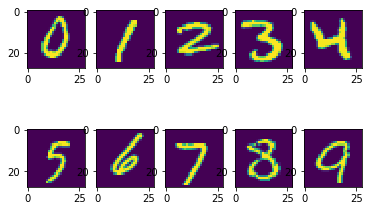

In [3]:
#Displaying examples of each numeric value found in the images data
plt.subplot(2,5,1)
plt.imshow(np.array(train_images[666]).reshape(28,28))
plt.subplot(2,5,2)
plt.imshow(np.array(train_images[77]).reshape(28,28))
plt.subplot(2,5,3)
plt.imshow(np.array(train_images[159]).reshape(28,28))
plt.subplot(2,5,4)
plt.imshow(np.array(train_images[12]).reshape(28,28))
plt.subplot(2,5,5)
plt.imshow(np.array(train_images[20]).reshape(28,28))
plt.subplot(2,5,6)
plt.imshow(np.array(train_images[420]).reshape(28,28))
plt.subplot(2,5,7)
plt.imshow(np.array(train_images[999]).reshape(28,28))
plt.subplot(2,5,8)
plt.imshow(np.array(train_images[9001]).reshape(28,28))
plt.subplot(2,5,9)
plt.imshow(np.array(train_images[404]).reshape(28,28))
plt.subplot(2,5,10)
plt.imshow(np.array(train_images[3000]).reshape(28,28))
plt.show()

## Part 4
KNN works for unclassified data points by examining the K surrounding classified data points and assigning the data point in question with the classification that occurs the most for the K surrounding classified data points.  Suppose an unclassified data point existed among 10 classified data points consisting of 7 red and 3 blue points.  If we were to run a K=10 KNN algorithm, given that there exists 7 red points compared to 3 blue points, the previously unclassified data point would be classified as a red data point.  

## Part 5
Developing and testing functions for accuracy, sensitivity, specificity, precision and negative predictive values.

In [4]:
# Function for Accuracy
def accuracy(tp, fp, fn, tn):
    acc = (tp+tn)/(tp+fp+fn+tn)
    return (acc)
# Function for Recall also known as Sensitivity, thus using sens as the variable name
def recall(tp, fp, fn, tn):
    sens = tp/(tp+fn)
    return (sens)
# Function for Specificity
def specificity(tp, fp, fn, tn):
    spec = tn/(tn+fp)
    return (spec)
# Function for Precision
def precision(tp, fp, fn, tn):
    prec = tp/(tp+fp)
    return (prec)
# Function for Negative Predictive Value
def NegPredVal(tp, fp, fn, tn):
    npv = tn/(tn+fn)
    return (npv)
# Function for F1_Score or the harmonic average of precision and sensitivity
def f1_score(tp, fp, fn, tn):
    p=precision(tp,fp,fn,tn)
    r=recall(tp,fp,fn,tn)
    f1s = (2*p*r/(p+r))
    return (f1s)

In [5]:
# 5] Develop python functions to compute the accuracy, sensitivity, specificity, precision and negative predictive value.
# Testing functions agains values achieved in lab
tp=3370.
tn=73.
fn=7.
fp=690.

print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
print("Specificity (spec): ", specificity(tp,fp,fn,tn))
print("Precision (prec): ", precision(tp,fp,fn,tn))
print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))
print("F1_Score (f1s):", f1_score(tp,fp,fn,tn))
print (tp, tn, fn, fp)
# Printing values for these functions pulled from the Lab5
print("\n\nLAccy:= 0.831 \nLRecl:= 0.997 \nLSpec:= 0.095 \nLPrcn:= 0.830 \nLNpvl:= 0.912 \nLF1sc:= 0.906")
# Values Match

('Accuracy (acc): ', 0.8316425120772947)
('Sensitivity (sens/recall): ', 0.9979271542789458)
('Specificity (spec): ', 0.09567496723460026)
('Precision (prec): ', 0.8300492610837439)
('Negative Predictive Value (npv): ', 0.9125)
('F1_Score (f1s):', 0.9062794137421004)
(3370.0, 73.0, 7.0, 690.0)


LAccy:= 0.831 
LRecl:= 0.997 
LSpec:= 0.095 
LPrcn:= 0.830 
LNpvl:= 0.912 
LF1sc:= 0.906


I used the tp, tn, fn, and fp values that we used in Lab 5 to test the accuracy of the test scores developed in part 5, all scores matched the values that we achieved in Lab 5. <br> 
## Part 6 ##
Application of KNN classifier with {3,4,5} neighbors<br>
-Confusion Matrix<br>
-Use of Acc, Sens, Spec, Prec, NPV<br>
-Comparrison

In [6]:
#Storing values in variables for use further on
X_train = np.array(train_images[1:3000])
y_train = np.array(train_labels[1:3000])
X_test = np.array(test_images[1:3000])
y_test = np.array(test_labels[1:3000])

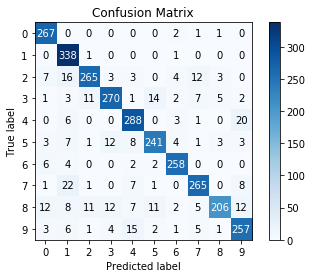

('Accuracy (acc): ', array([0.98766255, 0.97532511, 0.97532511, 0.97432477, 0.97565855,
       0.975992  , 0.98899633, 0.975992  , 0.96898966, 0.97232411]))
('Sensitivity (sens/recall): ', array([0.98523985, 0.99411765, 0.84664537, 0.85443038, 0.90566038,
       0.85159011, 0.94852941, 0.86885246, 0.72027972, 0.87118644]))
('Specificity (spec): ', array([0.98790323, 0.97292215, 0.99032018, 0.98844577, 0.98396121,
       0.98895434, 0.99303264, 0.98812175, 0.99520826, 0.98335799]))
('Precision (prec): ', array([0.89      , 0.82439024, 0.91065292, 0.89700997, 0.87009063,
       0.88929889, 0.93140794, 0.89225589, 0.94063927, 0.85099338]))
('Negative Predictive Value (npv): ', array([0.99851797, 0.9992275 , 0.98227474, 0.98295033, 0.98875562,
       0.98460411, 0.99485672, 0.98519615, 0.97122302, 0.98591027]))
[[267.   0.   0.   0.   0.   0.   2.   1.   1.   0.]
 [  0. 338.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  7.  16. 265.   3.   3.   0.   4.  12.   3.   0.]
 [  1.   3.  11. 270. 

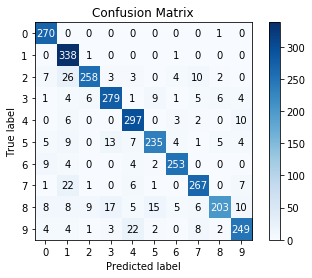

('Accuracy (acc): ', array([0.987996  , 0.97165722, 0.97565855, 0.97565855, 0.97699233,
       0.97432477, 0.98766255, 0.97665889, 0.966989  , 0.972991  ]))
('Sensitivity (sens/recall): ', array([0.99630996, 0.99411765, 0.82428115, 0.88291139, 0.93396226,
       0.83038869, 0.93014706, 0.87540984, 0.70979021, 0.8440678 ]))
('Specificity (spec): ', array([0.98717009, 0.96878526, 0.99329859, 0.98658218, 0.98209623,
       0.98932253, 0.99339934, 0.98812175, 0.99410247, 0.98705621]))
('Precision (prec): ', array([0.8852459 , 0.80285036, 0.93478261, 0.88571429, 0.86086957,
       0.89015152, 0.93357934, 0.89297659, 0.92694064, 0.87676056]))
('Negative Predictive Value (npv): ', array([0.9996288 , 0.9992242 , 0.97980169, 0.98621461, 0.99208742,
       0.98244973, 0.99303519, 0.98592593, 0.97014388, 0.98305709]))
[[270.   0.   0.   0.   0.   0.   0.   0.   1.   0.]
 [  0. 338.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  7.  26. 258.   3.   3.   0.   4.  10.   2.   0.]
 [  1.   4.   6. 279. 

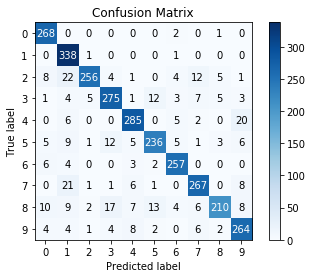

('Accuracy (acc): ', array([0.98766255, 0.972991  , 0.97732578, 0.97365789, 0.97865955,
       0.97432477, 0.98699567, 0.975992  , 0.96932311, 0.97432477]))
('Sensitivity (sens/recall): ', array([0.98892989, 0.99411765, 0.81789137, 0.87025316, 0.89622642,
       0.83392226, 0.94485294, 0.87540984, 0.73426573, 0.89491525]))
('Specificity (spec): ', array([0.98753666, 0.97028958, 0.99590469, 0.98583675, 0.98843715,
       0.98895434, 0.99119912, 0.98737936, 0.99410247, 0.98298817]))
('Precision (prec): ', array([0.88741722, 0.81055156, 0.9588015 , 0.87859425, 0.90189873,
       0.88721805, 0.91459075, 0.88704319, 0.92920354, 0.8516129 ]))
('Negative Predictive Value (npv): ', array([0.99888765, 0.99922541, 0.97913616, 0.98473567, 0.98770034,
       0.98280278, 0.99448124, 0.98591549, 0.97259286, 0.98847155]))
[[268.   0.   0.   0.   0.   0.   2.   0.   1.   0.]
 [  0. 338.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  8.  22. 256.   4.   1.   0.   4.  12.   5.   1.]
 [  1.   4.   5. 275. 

In [12]:
# For loop to generate confusion matrices and calculations for accuracy etc.
numneighb = range(3,6)
for i in numneighb:
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    predict = knn.predict(X_test)

    accuracy_score(predict, y_test)
    # initializing a 10 by 10 matrix for the confusion matrix 
    C = np.empty([10,10])
    for col in range(10):
        for row in range(10):
            C[row,col] = np.sum(np.logical_and(predict==col, y_test==row))
    # Calculation of fp fn tp and tn
    fp = C.sum(axis=0) - np.diag(C)  
    fn = C.sum(axis=1) - np.diag(C)
    tp = np.diag(C)
    tn = C.sum() - (fp + fn + tp)
    
    # Creation of a confusion matrix based on the above values
    skplt.metrics.plot_confusion_matrix(y_test, predict)
    np.sum(np.logical_and(predict == col, y_test==row))
    plt.show()
    # Pringing accuracy etc scores
    print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
    print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
    print("Specificity (spec): ", specificity(tp,fp,fn,tn))
    print("Precision (prec): ", precision(tp,fp,fn,tn))
    print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))
    print(C)

AxesSubplot(0.125,0.125;0.775x0.755)


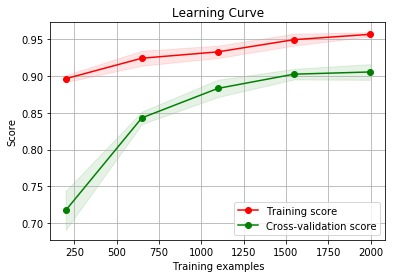

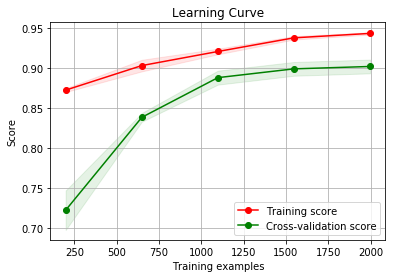

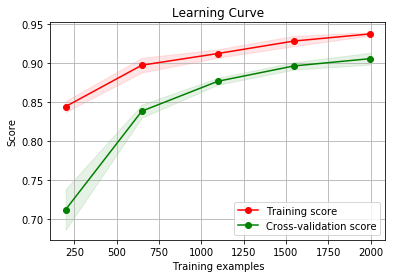

In [13]:
# Comparison of various knn tests for the tests above
numneighb = range(3,6)
for i in numneighb:
    knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    x = skplt.estimators.plot_learning_curve(knn, X_train, y_train)
print x

I cut the full data set down to use 3000 data points instead of the full data set for the sake of time.  Based on 3000 data points, the KNN models with 3, 4 and 5 neighbors each behaved similarly.  When I used 3 neighbors, the scores for all categories were above 0.73 for all score types.  Most notably Accuracy and Specificity had scores above 0.96.
For 4 neighbors Accuracy, Specificity, and NPV scores were above 0.96 for all categories, and all scores were above 0.70.  For 5 neighbors Accuracy, Specificity, and NPV scores were above 0.96 for all categories, and all scores were above 0.73.  As the number of neighbors increases the training scores decrease given that with more data being used in the calculations some predictions may be skewed.  This trend continued for my testing of a KNN where K=15 neighbors.

## Part 6, K = 15

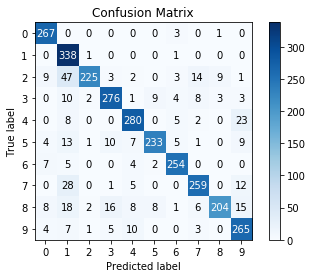

('Accuracy (acc): ', array([0.987996  , 0.95398466, 0.96832277, 0.97499166, 0.97499166,
       0.97699233, 0.98666222, 0.97332444, 0.96832277, 0.96898966]))
('Sensitivity (sens/recall): ', array([0.98523985, 0.99411765, 0.71884984, 0.87341772, 0.88050314,
       0.82332155, 0.93382353, 0.84918033, 0.71328671, 0.89830508]))
('Specificity (spec): ', array([0.98826979, 0.94885295, 0.99739389, 0.9869549 , 0.98619918,
       0.99300442, 0.99193253, 0.98737936, 0.99520826, 0.97670118]))
('Precision (prec): ', array([0.89297659, 0.71308017, 0.96982759, 0.88745981, 0.88328076,
       0.92460317, 0.92028986, 0.88395904, 0.94009217, 0.80792683]))
('Negative Predictive Value (npv): ', array([0.99851852, 0.99920792, 0.9681966 , 0.98511905, 0.98583147,
       0.98179833, 0.99338964, 0.98300074, 0.9705248 , 0.98876825]))


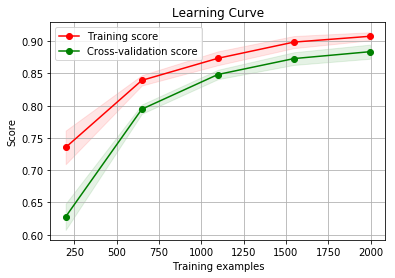

In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
predict = knn.predict(X_test)

accuracy_score(predict, y_test)
# initializing a 10 by 10 matrix for the confusion matrix 
C = np.empty([10,10])
for row in range(10):
    for col in range(10):
        C[row,col] = np.sum(np.logical_and(predict==col, y_test==row))
# Calculation of fp fn tp and tn
fp = C.sum(axis=0) - np.diag(C)  
fn = C.sum(axis=1) - np.diag(C)
tp = np.diag(C)
tn = C.sum() - (fp + fn + tp)
    
# Creation of a confusion matrix based on the above values
skplt.metrics.plot_confusion_matrix(y_test, predict)
np.sum(np.logical_and(predict == col, y_test==row))
plt.show()
# Pringing accuracy etc scores
print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
print("Specificity (spec): ", specificity(tp,fp,fn,tn))
print("Precision (prec): ", precision(tp,fp,fn,tn))
print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))

skplt.estimators.plot_learning_curve(knn, X_train, y_train)

## Part 7 ##

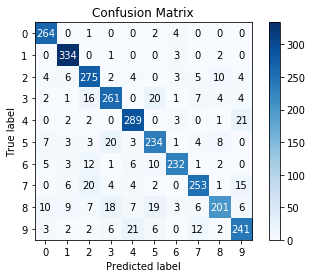

In [22]:
svm = SVC(kernel = 'linear', random_state = 5550)
svm.fit(X_train, y_train)
#Predicting the Test Set
y_pred = svm.predict(X_test)
#Confusion matrix for SVM
cm = confusion_matrix(y_test, y_pred)
# Printing confusion matrices
#print(cm)
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
np.sum(np.logical_and(y_pred == col, y_test==row))
plt.show()

In [18]:
# Calculation of test score variables based on the SVM confusion matrix
fp = cm.sum(axis=0) - np.diag(cm)  
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)
# Printing test scores from SVM confusion matrix
print("Accuracy (acc): ", accuracy(tp,fn,fp,tn))
print("Sensitivity (sens/recall): ", recall(tp,fp,fn,tn))
print("Specificity (spec): ", specificity(tp,fp,fn,tn))
print("Precision (prec): ", precision(tp,fp,fn,tn))
print("Negative Predictive Value (npv): ", NegPredVal(tp,fp,fn,tn))

('Accuracy (acc): ', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
('Sensitivity (sens/recall): ', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
('Specificity (spec): ', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
('Precision (prec): ', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))
('Negative Predictive Value (npv): ', array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


KNN Classification opperates using a voting method where each of the K neighbors associated with an uncategorized point has an equal vote for the point in question's category.  In comparison SVM employs hyperplanes to separate different classification types.  Given the differences in the way that these algorithms work, it is not suprising that the KNN Classifiers above had a much greater variation for test scoring values.  Upon running the same tests for the SVM Classifier, all test scores returned 0's.